In [2]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import numpy as np
import matplotlib.pyplot as plt
#from sqlalchemy import create_engine

In [3]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()


In [4]:
# connect to "Dataset" DB 
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"featureSTG\" ", con=conn)
pd.set_option('display.max_column',50)
df.head()

,level_0,index,id_student,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,q1_sum_clicks,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,allclicks,tma_cma_assmt_score,total_weight,is_reenrolled,final_exam_score
0,0,0,3733,1,261,0,0,0,0,-68.0,0,0,2,3,3,9.0,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,1,1,6516,0,269,0,1,0,1,-52.0,0,0,2,0,3,8.0,60,256.0,790.0,389.0,715.0,641.0,2791.0,63.5,100.0,0.0,0.0
2,2,2,8462,1,261,0,0,0,0,-137.0,0,0,2,2,3,3.0,90,81.0,442.0,123.0,0.0,0.0,646.0,34.9,40.0,0.0,0.0
3,3,3,8462,1,262,0,1,1,0,-38.0,0,0,2,2,3,3.0,60,0.0,10.0,0.0,0.0,0.0,10.0,43.0,50.0,1.0,0.0
4,4,4,11391,0,268,0,0,0,1,-159.0,0,0,2,1,3,9.0,240,98.0,431.0,99.0,85.0,221.0,934.0,82.4,100.0,0.0,0.0


In [5]:
df.dtypes

level_0                         int64
index                           int64
id_student                      int64
module_domain                   int64
module_presentation_length      int64
term                            int64
year                            int64
num_of_prev_attempts            int64
final_result                    int64
date_registration             float64
disability                      int64
gender                          int64
age_band                        int64
region                          int64
highest_education               int64
imd_band                      float64
studied_credits                 int64
b4_sum_clicks                 float64
q1_sum_clicks                 float64
q2_sum_clicks                 float64
q3_sum_clicks                 float64
q4_sum_clicks                 float64
allclicks                     float64
tma_cma_assmt_score           float64
total_weight                  float64
is_reenrolled                 float64
final_exam_s


df['imd_band']=df['imd_band'].map({'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9})
df['module_domain'] = df['module_domain'].map({'SocialScience': 0,'STEM': 1})
df['term'] = df['term'].map({'J': 0,'B': 1})
df['year'] = df['year'].map({'2013': 0,'2014': 1})
df['is_reenrolled'] = df['is_reenrolled'].replace(range(1,12), 1)
df['gender'] = df['gender'].map({'M': 0,'F': 1})
df['age_band'] = df['age_band'].map({'0-35': 0,'35-55': 1,'55<=':2})
df['region'] = df['region'].map({'Scotland': 0,'East Anglian Region': 1,'London Region':2,'South Region': 3,'North Western Region': 4,'West Midlands Region':5,'South West Region': 6,'East Midlands Region': 7,'South East Region':8,'Wales': 9,'Yorkshire Region': 10,'North Region':11,'Ireland':12})
df['pass_fail_ind'] = df['pass_fail_ind'].map({'FAIL':0,'PASS':1})
df['disability'] = df['disability'].map({'N':0,'Y':1})
df['highest_education'] = df['highest_education'].map({'No Formal quals':0,'Lower Than A Level':1,'A Level or Equivalent':2,'HE Qualification':3,'Post Graduate Qualification':4})

In [6]:
df['term'].count()

32593

In [7]:
df['year'].isnull().sum()

0

In [8]:
df.groupby(['year','term'])['module_domain'].count()

year  term
0     0        8845
      1        4684
1     0       11260
      1        7804
Name: module_domain, dtype: int64

In [9]:
df.groupby(['year','term']).count()

level_0  index  id_student  module_domain  \
year term                                              
0    0        8845   8845        8845           8845   
     1        4684   4684        4684           4684   
1    0       11260  11260       11260          11260   
     1        7804   7804        7804           7804   

           module_presentation_length  num_of_prev_attempts  final_result  \
year term                                                                   
0    0                           8845                  8845          8845   
     1                           4684                  4684          4684   
1    0                          11260                 11260         11260   
     1                           7804                  7804          7804   

           date_registration  disability  gender  age_band  region  \
year term                                                            
0    0                  8835        8845    8845      8845    8845   
     1                  4676        4684    4684      4684    4684   
1    0                 11251       11260   11260     11260   11260   
     1                  7786        7804    7804      7804    7804   

           highest_education  imd_band  studied_credits  b4_sum_clicks  \
year term                                                                
0    0                  8845      8578             8845           7081   
     1                  4684      4507             4684           3801   
1    0                 11260     10865            11260           8922   
     1                  7804      7532             7804           5989   

           q1_sum_clicks  q2_sum_clicks  q3_sum_clicks  q4_sum_clicks  \
year term                                                               
0    0              7081           7081           7081           7081   
     1              3801           3801           3801           3801   
1    0              8922           8922           8922           8922   
     1              5989           5989           5989           5989   

           allclicks  tma_cma_assmt_score  total_weight  is_reenrolled  \
year term                                                                
0    0          7081                 7081          7081           8845   
     1          3801                 3801          3801           4684   
1    0          8922                 8922          8922          11260   
     1          5989                 5989          5989           7804   

           final_exam_score  
year term                    
0    0                 7081  
     1                 3801  
1    0                 8922  
     1                 5989

### Chek observations for Year 2014 Term J and STEM class

In [10]:
df.groupby(['year','term','module_domain']).count()

level_0  index  id_student  \
year term module_domain                               
0    0    0                 3572   3572        3572   
          1                 5273   5273        5273   
     1    0                 1767   1767        1767   
          1                 2917   2917        2917   
1    0    0                 3406   3406        3406   
          1                 7854   7854        7854   
     1    0                 2446   2446        2446   
          1                 5358   5358        5358   

                         module_presentation_length  num_of_prev_attempts  \
year term module_domain                                                     
0    0    0                                    3572                  3572   
          1                                    5273                  5273   
     1    0                                    1767                  1767   
          1                                    2917                  2917   
1    0    0                                    3406                  3406   
          1                                    7854                  7854   
     1    0                                    2446                  2446   
          1                                    5358                  5358   

                         final_result  date_registration  disability  gender  \
year term module_domain                                                        
0    0    0                      3572               3570        3572    3572   
          1                      5273               5265        5273    5273   
     1    0                      1767               1766        1767    1767   
          1                      2917               2910        2917    2917   
1    0    0                      3406               3405        3406    3406   
          1                      7854               7846        7854    7854   
     1    0                      2446               2441        2446    2446   
          1                      5358               5345        5358    5358   

                         age_band  region  highest_education  imd_band  \
year term module_domain                                                  
0    0    0                  3572    3572               3572      3538   
          1                  5273    5273               5273      5040   
     1    0                  1767    1767               1767      1746   
          1                  2917    2917               2917      2761   
1    0    0                  3406    3406               3406      3384   
          1                  7854    7854               7854      7481   
     1    0                  2446    2446               2446      2430   
          1                  5358    5358               5358      5102   

                         studied_credits  b4_sum_clicks  q1_sum_clicks  \
year term module_domain                                                  
0    0    0                         3572           2878           2878   
          1                         5273           4203           4203   
     1    0                         1767           1368           1368   
          1                         2917           2433           2433   
1    0    0                         3406           2733           2733   
          1                         7854           6189           6189   
     1    0                         2446           1889           1889   
          1                         5358           4100           4100   

                         q2_sum_clicks  q3_sum_clicks  q4_sum_clicks  \
year term module_domain                                                
0    0    0                       2878           2878           2878   
          1                       4203           4203           4203   
     1    0                       1368           1368           1368   
          1                       2433           2433       

### Create a temporaray data frame 

In [15]:
tempDf = df[['year','term','module_domain','region','gender','disability','allclicks','age_band','module_presentation_length','num_of_prev_attempts','final_result','highest_education','is_reenrolled','imd_band','studied_credits']]
tempDf.head(20)

,year,term,module_domain,region,gender,disability,allclicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,is_reenrolled,imd_band,studied_credits
0,0,0,1,3,0,0,NaN,2,261,0,0,3,0.0,9.0,60
1,1,0,0,0,0,0,2791.0,2,269,0,1,3,0.0,8.0,60
2,0,0,1,2,0,0,646.0,2,261,0,0,3,0.0,3.0,90
3,1,0,1,2,0,0,10.0,2,262,1,0,3,1.0,3.0,60
4,0,0,0,1,0,0,934.0,2,268,0,1,3,0.0,9.0,240
5,0,1,0,1,1,0,161.0,0,240,2,0,1,0.0,2.0,60
6,0,0,0,1,1,0,NaN,0,268,0,0,2,0.0,4.0,60
7,1,0,1,1,1,0,910.0,0,269,0,1,2,0.0,5.0,120
8,0,0,0,9,0,0,590.0,0,268,0,1,2,0.0,5.0,60
9,1,1,0,10,1,1,184.0,0,241,0,1,1,0.0,1.0,30


In [16]:
tempDf = tempDf.loc[(tempDf.year == 1)&(tempDf.term==0)&(tempDf.module_domain==1)]
# Show first 20 observations of the dataset
tempDf.head(20)

,year,term,module_domain,region,gender,disability,allclicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,is_reenrolled,imd_band,studied_credits
3,1,0,1,2,0,0,10.0,2,262,1,0,3,1.0,3.0,60
7,1,0,1,1,1,0,910.0,0,269,0,1,2,0.0,5.0,120
16,1,0,1,0,1,0,997.0,0,269,0,0,3,0.0,4.0,60
17,1,0,1,2,1,0,113.0,0,262,2,0,3,0.0,1.0,150
30,1,0,1,10,0,0,1847.0,0,269,0,1,3,0.0,7.0,120
33,1,0,1,6,0,0,100.0,0,262,1,0,1,0.0,6.0,60
47,1,0,1,0,0,0,NaN,0,269,0,0,1,0.0,2.0,30
48,1,0,1,8,0,0,645.0,1,269,0,1,1,0.0,8.0,60
51,1,0,1,10,1,0,105.0,0,269,0,0,1,0.0,6.0,60
54,1,0,1,7,0,0,329.0,0,269,0,0,2,0.0,8.0,150


In [17]:
tempDf.count()

year                          7854
term                          7854
module_domain                 7854
region                        7854
gender                        7854
disability                    7854
allclicks                     6189
age_band                      7854
module_presentation_length    7854
num_of_prev_attempts          7854
final_result                  7854
highest_education             7854
is_reenrolled                 7854
imd_band                      7481
studied_credits               7854
dtype: int64

In [18]:
# Create a Heatmap
## import packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

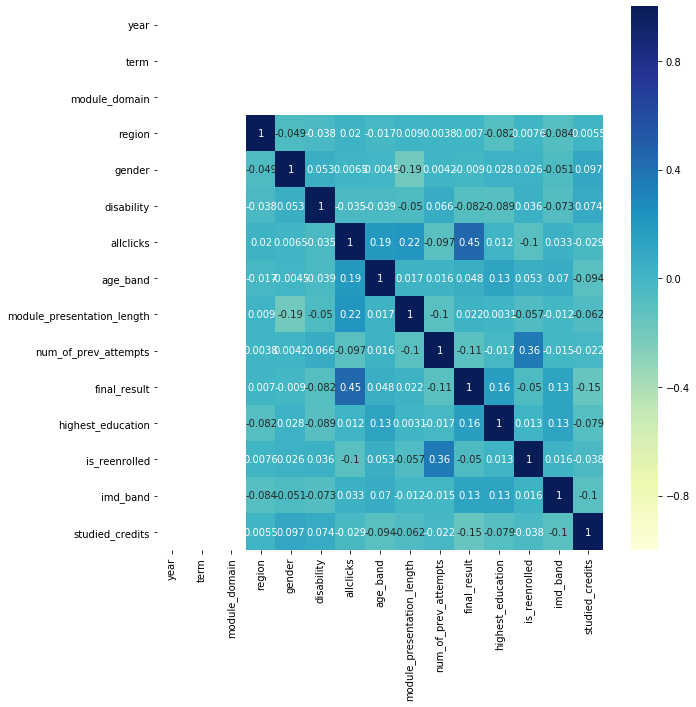

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(tempDf.corr(),vmin=-1,cmap='YlGnBu',annot=True)
plt.show()

## Logistic Regression

In [20]:
tempDf.head(20)

,year,term,module_domain,region,gender,disability,allclicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,is_reenrolled,imd_band,studied_credits
3,1,0,1,2,0,0,10.0,2,262,1,0,3,1.0,3.0,60
7,1,0,1,1,1,0,910.0,0,269,0,1,2,0.0,5.0,120
16,1,0,1,0,1,0,997.0,0,269,0,0,3,0.0,4.0,60
17,1,0,1,2,1,0,113.0,0,262,2,0,3,0.0,1.0,150
30,1,0,1,10,0,0,1847.0,0,269,0,1,3,0.0,7.0,120
33,1,0,1,6,0,0,100.0,0,262,1,0,1,0.0,6.0,60
47,1,0,1,0,0,0,NaN,0,269,0,0,1,0.0,2.0,30
48,1,0,1,8,0,0,645.0,1,269,0,1,1,0.0,8.0,60
51,1,0,1,10,1,0,105.0,0,269,0,0,1,0.0,6.0,60
54,1,0,1,7,0,0,329.0,0,269,0,0,2,0.0,8.0,150


In [21]:
# drop missing values
tempDf=tempDf.dropna()
tempDf.head(20)

,year,term,module_domain,region,gender,disability,allclicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,is_reenrolled,imd_band,studied_credits
3,1,0,1,2,0,0,10.0,2,262,1,0,3,1.0,3.0,60
7,1,0,1,1,1,0,910.0,0,269,0,1,2,0.0,5.0,120
16,1,0,1,0,1,0,997.0,0,269,0,0,3,0.0,4.0,60
17,1,0,1,2,1,0,113.0,0,262,2,0,3,0.0,1.0,150
30,1,0,1,10,0,0,1847.0,0,269,0,1,3,0.0,7.0,120
33,1,0,1,6,0,0,100.0,0,262,1,0,1,0.0,6.0,60
48,1,0,1,8,0,0,645.0,1,269,0,1,1,0.0,8.0,60
51,1,0,1,10,1,0,105.0,0,269,0,0,1,0.0,6.0,60
54,1,0,1,7,0,0,329.0,0,269,0,0,2,0.0,8.0,150
56,1,0,1,9,0,0,816.0,0,269,0,1,2,0.0,7.0,30


In [22]:
tempDf.count()

year                          5852
term                          5852
module_domain                 5852
region                        5852
gender                        5852
disability                    5852
allclicks                     5852
age_band                      5852
module_presentation_length    5852
num_of_prev_attempts          5852
final_result                  5852
highest_education             5852
is_reenrolled                 5852
imd_band                      5852
studied_credits               5852
dtype: int64

In [23]:
# Define our predictors
X=tempDf[['gender','disability','allclicks','age_band','num_of_prev_attempts','highest_education','studied_credits']]
y=tempDf['final_result']

In [24]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# In this case, I set the test size to 0.25, and therefore the model testing will be based on 25% of the dataset, 
# while the model training will be based on 75% of the dataset

In [25]:
from sklearn.linear_model import LogisticRegression
# Initialize our algorithm
# lr = LogisticRegression(random_state=1, solver='liblinear')
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/Users/yifei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


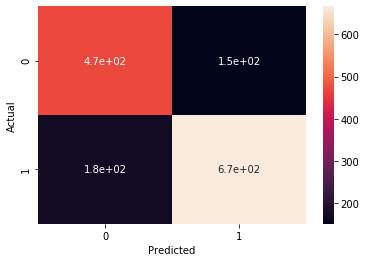

In [26]:
# Get a Confusion Matrix
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [27]:
# Print the Accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7764866712235133


In [28]:
# As can be observed from the matrix, the accuracy is therefore 78% for the test set.

## Diving Deeper into the Results

In [32]:
print(X_test) # test dataset (without the actual outcome)

       gender  disability  allclicks  age_band  num_of_prev_attempts  \
9267        0           0      425.0         0                     0   
30361       1           0     1235.0         1                     0   
16898       1           0     1525.0         1                     0   
12762       1           1      807.0         1                     0   
25422       0           0     1680.0         0                     0   
24863       0           1      282.0         0                     0   
28301       0           0     3194.0         0                     0   
18844       0           0      709.0         1                     0   
27822       0           0      641.0         1                     0   
24207       1           1     1221.0         0                     0   
13244       1           0      450.0         0                     1   
26558       1           0      832.0         0                     0   
8262        1           0     4525.0         1                  

In [31]:
print(y_pred)

[0 0 1 ... 1 0 0]


In [51]:
# Checking the prediction for a New Set of Data
# Let's use our model to predict Year 2014 Term B STEM class. 
# My goal is to use the existing logistic regression model to predict whether the new student will pass or fail.
# Create a new temporary data frame
tempDf2 = df[['year','term','module_domain','final_result','gender','disability','allclicks','age_band','num_of_prev_attempts','highest_education','studied_credits']]
tempDf2 = tempDf2.loc[(tempDf2.year == 1)&(tempDf2.term==1)&(tempDf2.module_domain==1)]
# Show first 20 observations of the dataset
tempDf2.head(20)

,year,term,module_domain,final_result,gender,disability,allclicks,age_band,num_of_prev_attempts,highest_education,studied_credits
11,1,1,1,1,1,0,1992.0,0,1,2,60
15,1,1,1,1,0,0,2103.0,0,0,3,60
23,1,1,1,1,1,0,15205.0,1,0,3,90
25,1,1,1,0,0,0,NaN,1,0,1,60
31,1,1,1,0,1,0,2638.0,1,0,1,120
36,1,1,1,1,0,0,2129.0,0,0,3,60
38,1,1,1,1,0,0,553.0,0,0,2,150
44,1,1,1,0,0,0,NaN,1,0,2,60
46,1,1,1,0,1,0,328.0,0,0,2,30
49,1,1,1,0,1,0,232.0,0,0,2,60


In [52]:
tempDf2.count()

year                    5358
term                    5358
module_domain           5358
final_result            5358
gender                  5358
disability              5358
allclicks               4100
age_band                5358
num_of_prev_attempts    5358
highest_education       5358
studied_credits         5358
dtype: int64

In [53]:
# Again, we drop those missing values
tempDf2=tempDf2.dropna()
tempDf2.head(20)

,year,term,module_domain,final_result,gender,disability,allclicks,age_band,num_of_prev_attempts,highest_education,studied_credits
11,1,1,1,1,1,0,1992.0,0,1,2,60
15,1,1,1,1,0,0,2103.0,0,0,3,60
23,1,1,1,1,1,0,15205.0,1,0,3,90
31,1,1,1,0,1,0,2638.0,1,0,1,120
36,1,1,1,1,0,0,2129.0,0,0,3,60
38,1,1,1,1,0,0,553.0,0,0,2,150
46,1,1,1,0,1,0,328.0,0,0,2,30
49,1,1,1,0,1,0,232.0,0,0,2,60
50,1,1,1,1,0,0,3367.0,0,0,2,120
58,1,1,1,1,0,0,3517.0,0,0,1,30


In [54]:
tempDf2.count()

year                    4100
term                    4100
module_domain           4100
final_result            4100
gender                  4100
disability              4100
allclicks               4100
age_band                4100
num_of_prev_attempts    4100
highest_education       4100
studied_credits         4100
dtype: int64

In [58]:
# Now our new temporary dataset has 4100 observations
df2 = pd.DataFrame(tempDf2,columns= ['gender', 'disability','allclicks','age_band','num_of_prev_attempts','highest_education','studied_credits'])

In [59]:
# Show the first 20 observations
df2.head(20)

,gender,disability,allclicks,age_band,num_of_prev_attempts,highest_education,studied_credits
11,1,0,1992.0,0,1,2,60
15,0,0,2103.0,0,0,3,60
23,1,0,15205.0,1,0,3,90
31,1,0,2638.0,1,0,1,120
36,0,0,2129.0,0,0,3,60
38,0,0,553.0,0,0,2,150
46,1,0,328.0,0,0,2,30
49,1,0,232.0,0,0,2,60
50,0,0,3367.0,0,0,2,120
58,0,0,3517.0,0,0,1,30


In [69]:
# Define our predictors, this is the model we use in the previous dataset (tempDf)
X=tempDf[['gender','disability','allclicks','age_band','num_of_prev_attempts','highest_education','studied_credits']]
y=tempDf['final_result']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

/Users/yifei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
# See how our model works
y_pred_new=logistic_regression.predict(df2)
y_test_new=tempDf2['final_result']

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1947
           1       0.77      0.83      0.80      2153

    accuracy                           0.78      4100
   macro avg       0.78      0.78      0.78      4100
weighted avg       0.78      0.78      0.78      4100



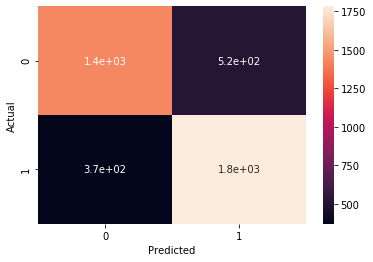

In [78]:
confusion_matrix = pd.crosstab(y_test_new, y_pred_new, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [79]:
# Print the Accuracy
print('Accuracy: ',metrics.accuracy_score(y_test_new, y_pred_new))

Accuracy:  0.7829268292682927
